### 선형회귀
- 회귀의 개념 linear regression 대표적인 회귀 알고리즘
- 직선을 통해서 해당 데이터의 특징을 가장 잘 나타내는 식을 도출
- 일차방정식의 회귀식이 만들어진다.
- 사람의 키를 가지고 예시를 들면 부모의 키가 크다면 자식들도 부모의 영향을 받아서 크고 무한정 커지는 것이 아닌가?
- 부모의 키가 작다면 자식도 부모의 영향을 받아 키가 계속 작아지는 건가?
- 평균으로 회귀하는 경향, 자연적인 법칙


- 회귀는 독립변수 종속변수 상관관계를 모델링
- 독립변수는 여러 개 가능하며, 종속변수는 한 개를 통해서 진행
- 선형회귀의 목적에 따라 사용할 수 있다.


#### 데이터에 대한 이해와 관계를 알기 위해서!
- 연봉과 일 업무시간의 관계를 알아보고 싶은 경우! 독립변수와 종속변수의 변화 또는 관계를 이해해야하는 경우
- 회귀분석을 통해서 밝혀낸다.
- 회귀분석에서 제공하는 다양한 값들 R^2 등의 값들을 이해하고 해석할 수 있다.


#### 예측을 위해서 사용!
- 회귀분석을 통해서 머신러닝의 개념으로 값을 예측하는 것
- 회귀식에 특정 값을 넣어서 예측하는 방식
- 일을 더 많이 하면 연봉이 더 올라갈 것이다. 일을 3시간 더 하면 연봉은 얼마일 것?


#### 인과관계에 대한 증명하기 위해서
- 인과관계를 측정하고 맞는지 회귀분석을 활용한다.
- 통제를 통해 다른 요인은 모두 통제하고, 해당 알고싶은 요인들만 분석을 진행하고 검증하는 법


- 독립변수 1개 단일회귀, 회귀계수의 결합을 해서 선형회귀
- 독립변수가 여러 개인 경우는 다중 회귀, 선형적이지 않은 경우는 비선형회귀
- 데이터의 분포가 선형적으로 보여지게 된다면 선형회귀를 사용할 수 있지만, 만약 데이터의 분포가 선형적이지 않으면?
- 그럴 땐 비선형회귀로 우리가 접근해야 한다.

- 다항회귀? 1차가 아닌 2차식으로 차수를 늘려서 회귀식을 도출하는 것

### 가장 대표적인 선형회귀를 배울 것
- 데이터에 대한 이해와 관계를 알기 위해 statsmodel을 사용해서 알아보자!

In [1]:
from sklearn import datasets
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
# 캘리포니아 주택 가격
calhouse = datasets.fetch_california_housing()
dfx = pd.DataFrame(calhouse.data, columns=calhouse.feature_names)
dfy = pd.DataFrame(calhouse.target, columns=["y"])
df = pd.concat([dfx, dfy], axis=1)

In [3]:
calhouse

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### 컬럼 설명서
- longitude : 경도
- latitude : 위도
- housing_median_age : 주택 나이(중앙값)
- total_rooms : 전체 방 수
- total_bedrooms : 전체 침실 수
- population : 인구 수
- households : 세대 수
- median_income : 소득(중앙값)
- median_house_value : 주택 가치(중앙값)
- ocean_proximity : 바다 근접도

In [5]:
df_sp1 = df[["MedInc","y"]]

In [6]:
df_sp1

,MedInc,y
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.6431,3.413
4,3.8462,3.422
...,...,...
20635,1.5603,0.781
20636,2.5568,0.771
20637,1.7000,0.923
20638,1.8672,0.847


In [7]:
# stats 모델 사용!
model1 = sm.OLS.from_formula("y~MedInc", data=df_sp1)
res1 = model1.fit()

In [8]:
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        04:50:49   Log-Likelihood:                -25623.
No. Observations:               20640   AIC:                         5.125e+04
Df Residuals:                   20638   BIC:                         5.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4509      0.013     34.082      0.000       0.425       0.477
MedInc         0.4179      0.003    136.223      0.000       0.412       0.424
==============================================================================
Omnibus:                     4245.795   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9273.446
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 1.
- R-squared: 결정계수, R2 회귀모델이 얼마나 설명력이 있는가? 회귀의 설명력을 나타낼 때 많이 이야기하고 1이면 가장 좋은 성능
- Adj.R-squared: 조정된 결정계수, 독립변수가 여러 개 있는 경우는 데이터를 조정하여 나오는 값
- F-statistic: F통계량은 도출된 회귀식이 적절한지 확인하는 것. 클수록 적절한 것
- Prob (F-statistic): 유의미한지 판단하는 것. 0.05 이하인 경우는 변수끼리 매우 관련있다고 판단
- AIC : 모델을 평가하는 지표, 수치가 낮으면 좋다.
- BIC : 모델을 평가하는데 패널티를 부여하고, 수치가 낮으면 좋다.

### 2.
- coef : 회귀계수값
- std error : 계수의 추정치의 대한 표준오차, 작을수록 좋다.
- t : t.test 독립변수, 종속변수 사이의 관계를 확인할 수 있음.
- p > |t| : 독립변수가 유의한지 보는 확률, 유의확률 0.05보다 작아야 유의미함

### 3.
- Omnibus : 비대칭(왜도), 첨도 등을 결합해서 정규성 테스트를 한다. 값이 크면 클수록 정규분포에 가깝다.
- Prob(Omnibus): 유의확률 0.05 이하일 경우 유의하다 판단.
- Skew 왜도 - 치우쳐 있는지
- Kurtosis 첨도 - 뾰족한지
- Durbin-Watson: 잔차의 독립성 여부 판단 1.5~2.5 사이일 때 잔차는 독립적이다라고 판단하고 0이나 4는 잔차들이 자기상관이 있다.
- Jarque-Bera (JB): 자크베라 정규성 검정 값, 클수록 정규분포의 데이터를 사용했다는 것
- Cond. No.	다중공선성 : 독립변수 간의 상관관계를 보는 것, 10 이상이면 다중공선성이 있다 판단.

R-squared 결정계수 : 총변동 중에서 설명되는 비율

SST = SSE + SSR

(Total Sum of Squares) = (Explained Sum of Squares) + (Residual Sum of Squares) <- 이걸 기준으로 설명할 경우... 총변동 = 설명된 변동 + 설명되지않은 변동

cf) (Total Sum of Squares) = (Regression Sum of Squares) + (Error Sum of Squares) <- 이게 더 일반적?

R^2 = SSE/SST = (설명)/(총변동) = 1 - SSR/SST <- 1에 가까울수록 좋다.

### 데이터 전체를 가지고 넣기

In [9]:
# 전체 모델
model2 = sm.OLS.from_formula("y~"+"+".join(calhouse.feature_names), data=df)
res2 = model2.fit()

In [10]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        04:51:54   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.9419      0.659    -56.067      0.000     -38.233     -35.650
MedInc         0.4367      0.004    104.054      0.000       0.428       0.445
HouseAge       0.0094      0.000     21.143      0.000       0.009       0.010
AveRooms      -0.1073      0.006    -18.235      0.000      -0.119      -0.096
AveBedrms      0.6451      0.028     22.928      0.000       0.590       0.700
Population -3.976e-06   4.75e-06     -0.837      0.402   -1.33e-05    5.33e-06
AveOccup      -0.0038      0.000     -7.769      0.000      -0.005      -0.003
Latitude      -0.4213      0.007    -58.541      0.000      -0.435      -0.407
Longitude     -0.4345      0.008    -57.682      0.000      -0.449      -0.420
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 각각의 변수와 종속변수와의 관계를 볼 수 있는 코드
- partial Regression plot

In [11]:
import matplotlib.pyplot as plt

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


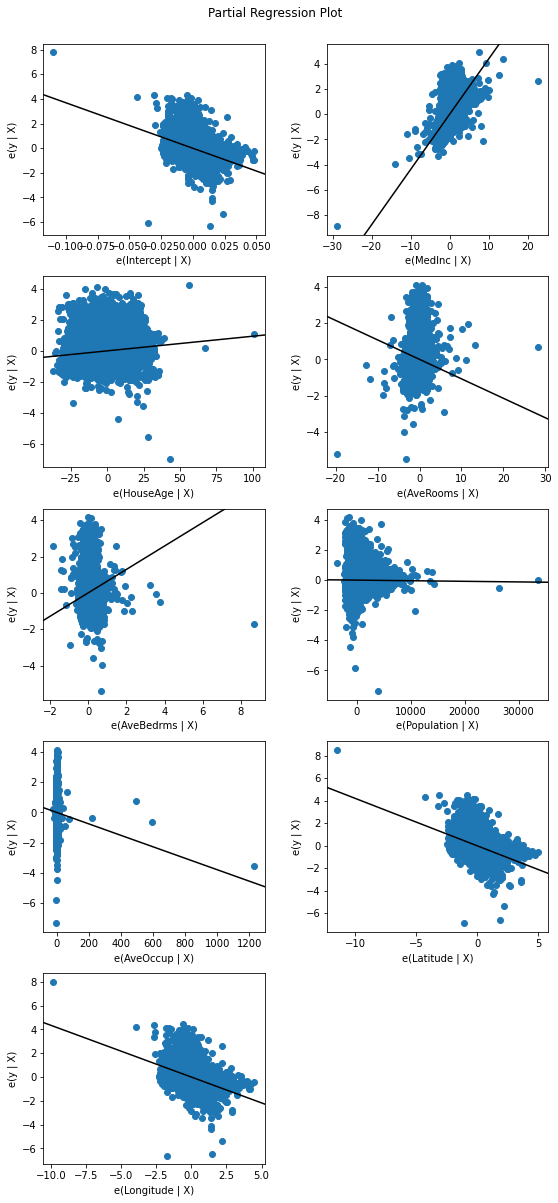

In [12]:
fig = plt.figure(figsize=(8,17))
sm.graphics.plot_partregress_grid(res2, fig=fig)
plt.show()

- CCPR Plot 개별 변수의 추정 회귀계수를 표현하는 Plot
- sm에서 제공

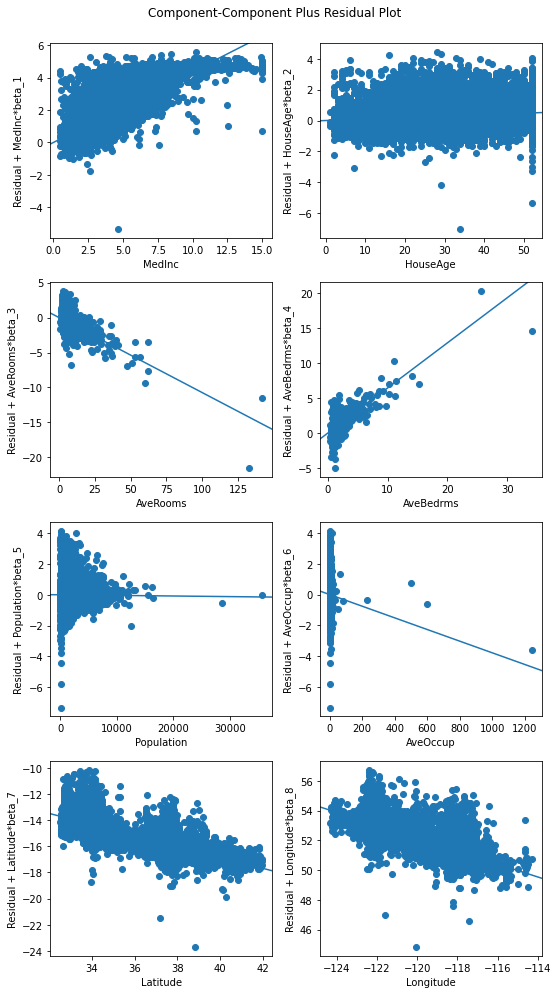

In [13]:
fig = plt.figure(figsize=(8,17))
sm.graphics.plot_ccpr_grid(res2, fig=fig)
plt.savefig("CCPR.png", transparent=False, facecolor="white")

In [14]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### 필수과제
- 단순한 raw 데이터를 가공 + 변수를 선정하여 회귀식의 값들을 더 높이자!
- 스케일링, 변수 선정일 수 있고, 다양한 방법을 통해서 바로 ols 확인한 결과와 비교해서 수치를 더 높이는 것을 진행
- 수치를 높이는 것을 진행하면서, 어떤 부분을 변화를 주었을 때 수치들이 올라갔는지를 꼭 정리해서 올려주시면 된다.